## Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 20:04:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2023-09-25 20:04:08 (21.6 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
df = pd.read_csv("/content/housing.csv", encoding="utf-8")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['ocean_proximity']

In [ ]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
for col in strings:
  df[col] = df[col].str.lower().str.replace(" ", "_")

In [ ]:
df.ocean_proximity.unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df = df[(df.ocean_proximity == "<1h_ocean") | (df.ocean_proximity == "inland")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [ ]:
df.ocean_proximity.unique()

array(['<1h_ocean', 'inland'], dtype=object)

In [ ]:
floats = list(df.dtypes[df.dtypes == "float64"].index)
floats

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
df = df[floats]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Question 1

There's one feature with missing values. What is it?

---


**total_bedrooms**

## EDA

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


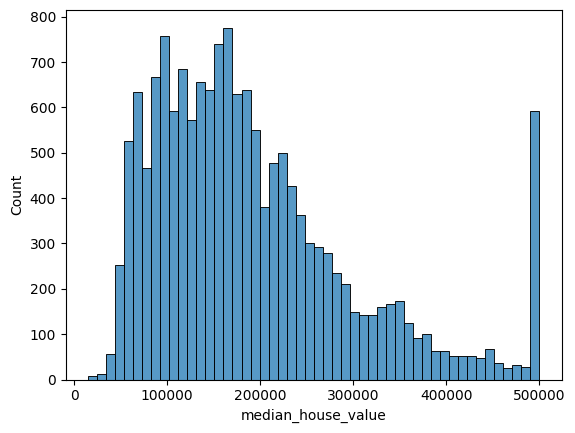

In [ ]:
sns.histplot(df.median_house_value, bins=50);

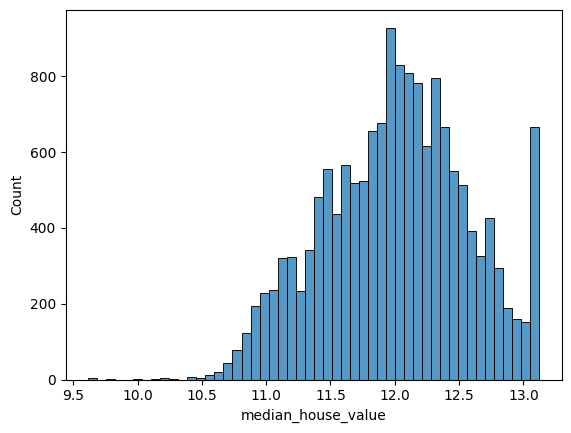

In [ ]:
sns.histplot(np.log1p(df.median_house_value), bins=50);

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Question 2

What's the median (50% percentile) for variable 'population'?



---
1195


Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [ ]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [ ]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [ ]:
df_zero = df.copy()

In [ ]:
df_zero.total_bedrooms = df_zero['total_bedrooms'].fillna(0)
df_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15687 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
def validation_framework(df, seed=42):
  n = len(df)
  n_val = int(n*0.2)
  n_test = int(n*0.2)
  n_train = n - n_val - n_test

  idx = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]]
  df_test = df.iloc[idx[n_train:n_train+n_val]]
  df_val = df.iloc[idx[n_train+n_val:]]
  return df_val, df_test, df_train

In [ ]:
df_val_zero, df_test_zero, df_train_zero = validation_framework(df_zero)
df_val_zero.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
11959,-117.44,33.90,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1257,-121.65,38.03,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
18438,-121.85,37.25,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
15069,-116.97,32.78,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
16227,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0


In [ ]:
df_val_zero = df_val_zero.reset_index(drop=True)
df_test_zero = df_test_zero.reset_index(drop=True)
df_train_zero = df_train_zero.reset_index(drop=True)

In [ ]:
df_val_zero.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.44,33.90,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1,-121.65,38.03,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
2,-121.85,37.25,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
3,-116.97,32.78,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
4,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0


In [ ]:
y_train_zero = np.log1p(df_train_zero.median_house_value)
y_val_zero = np.log1p(df_val_zero.median_house_value)
y_test_zero = np.log1p(df_test_zero.median_house_value)

In [ ]:
del df_train_zero["median_house_value"]
del df_val_zero["median_house_value"]
del df_test_zero["median_house_value"]

In [ ]:
base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']
X_train = df_train_zero[base].values

In [ ]:
def train_linear_reg(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [ ]:
w0, w = train_linear_reg(X_train, y_train_zero)

In [ ]:
y_pred = w0 + X_train.dot(w)

<Axes: xlabel='median_house_value', ylabel='Count'>

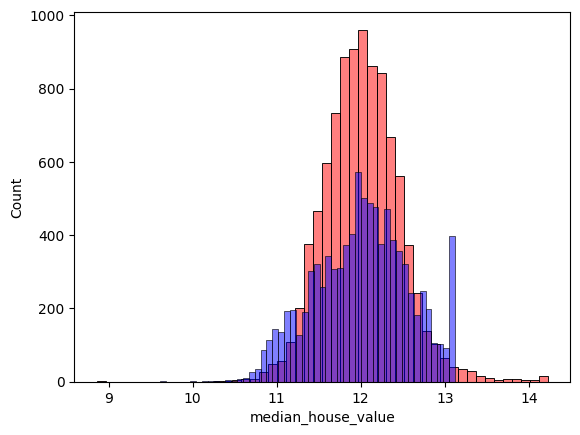

In [ ]:
sns.histplot(y_pred, color= "red", alpha = 0.5, bins = 50)
sns.histplot(y_train_zero, color = "blue", alpha = 0.5, bins = 50)

In [ ]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [ ]:
round(rmse(y_train_zero, y_pred),2)

0.34

In [ ]:
def prepare_X_zero(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X_zero(df_train_zero)
w0, w = train_linear_reg(X_train, y_train_zero)

X_val = prepare_X_zero(df_val_zero)
y_pred = w0 + X_val.dot(w)


In [ ]:
rmse_zero = round(rmse(y_val_zero, y_pred),2)
rmse_zero

0.33

<Axes: xlabel='median_house_value', ylabel='Count'>

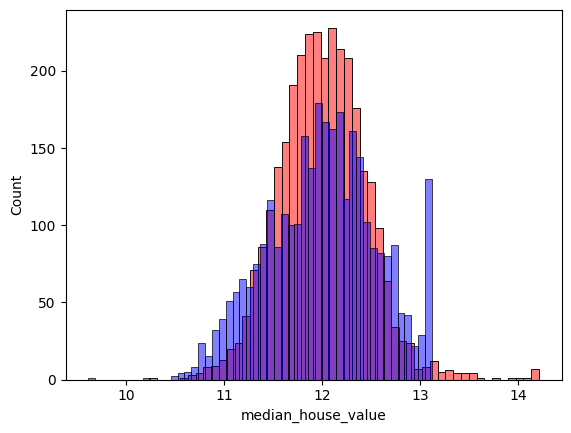

In [ ]:
sns.histplot(y_pred, color= "red", alpha = 0.5, bins = 50)
sns.histplot(y_val_zero, color = "blue", alpha = 0.5, bins = 50)

In [ ]:
def prepare_X_mean(df, mean_value):
  df_num = df[base]
  df_num.fillna(mean_value, inplace=True)
  X = df_num.values
  return X

In [ ]:
df_val, df_test, df_train = validation_framework(df)

In [ ]:
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [ ]:
mean_value=df_train['total_bedrooms'].mean()
X_train = prepare_X_mean(df_train, mean_value)
w0, w = train_linear_reg(X_train, y_train)

X_val = prepare_X_mean(df_val, mean_value)
y_pred = w0 + X_val.dot(w)


<ipython-input-145-2339c155f8d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.fillna(mean_value, inplace=True)
<ipython-input-145-2339c155f8d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.fillna(mean_value, inplace=True)


<Axes: xlabel='median_house_value', ylabel='Count'>

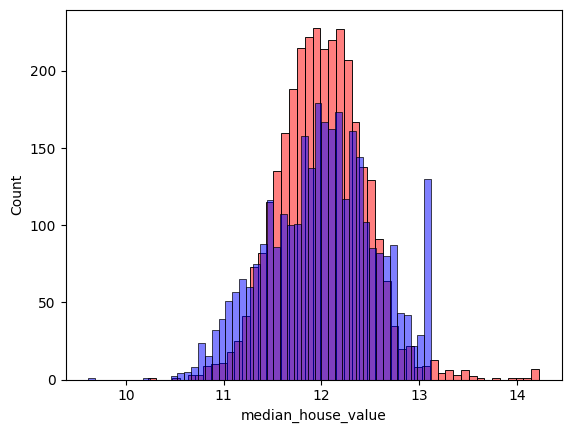

In [ ]:
sns.histplot(y_pred, color= "red", alpha = 0.5, bins = 50)
sns.histplot(y_val, color = "blue", alpha = 0.5, bins = 50)

In [ ]:
rmse_mean = round(rmse(y_val, y_pred),2)
rmse_zero, rmse_mean

(0.33, 0.33)

Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2) Which option gives better RMSE?


---
**Both are equally good**


Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

In [ ]:
def train_linear_reg_reg(X, y, r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [ ]:
df_val, df_test, df_train = validation_framework(df)

In [ ]:
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [ ]:
base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']

In [ ]:
rmse_mean_ls = []
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  X_train = prepare_X_zero(df_train)
  w0, w = train_linear_reg_reg(X_train, y_train, r)

  X_val = prepare_X_zero(df_val)
  y_pred = w0 + X_val.dot(w)
  rmse_val = round(rmse(y_val, y_pred),2)
  print(r, rmse_val)

0 0.33
1e-06 0.33
0.0001 0.33
0.001 0.33
0.01 0.33
0.1 0.33
1 0.33
5 0.34
10 0.34


In [ ]:
rmse_score_ls = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  df_val, df_test, df_train = validation_framework(df, seed)
  y_train = np.log1p(df_train.median_house_value)
  y_val = np.log1p(df_val.median_house_value)
  y_test = np.log1p(df_test.median_house_value)
  X_train = prepare_X_zero(df_train)
  w0, w = train_linear_reg(X_train, y_train)

  X_val = prepare_X_zero(df_val)
  y_pred = w0 + X_val.dot(w)
  rmse_val = rmse(y_val, y_pred)
  rmse_score_ls.append(rmse_val)
  print(seed, rmse_val)

0 0.3551559518846919
1 0.3520039292652328
2 0.33328548754582304
3 0.33684452530413894
4 0.3492991471535758
5 0.3342946980785788
6 0.343147334660002
7 0.3427885826637703
8 0.33752314765403935
9 0.3348843533702413


In [ ]:
round(np.std(rmse_score_ls), 3)

0.007

Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

---
**0.007 which is near to 0.005**


In [ ]:
df_val, df_test, df_train = validation_framework(df, 9)

In [ ]:
df_train = df_train.append(df_val, ignore_index=True)

<ipython-input-177-a6be53a829db>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_val, ignore_index=True)


In [ ]:
y_train = np.log1p(df_train.median_house_value)
y_test = np.log1p(df_test.median_house_value)
X_train = prepare_X_zero(df_train)
w0, w = train_linear_reg_reg(X_train, y_train, 0.001)

X_test = prepare_X_zero(df_test)
y_pred = w0 + X_test.dot(w)
rmse_val = round(rmse(y_test, y_pred),2)
rmse_val

0.33

Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

---
**0.33**
